In [ ]:
from torch.utils.data import Dataset

: 

In [ ]:
import os
import pandas as pd
# Define the path to the image directory and CSV file
image_dir = os.path.join('..', 'data')
csv_path = os.path.join('..', 'data', 'image_data.txt')



# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path, header=None, names=["path", "name", "magnification", "porosity"])
df["path"] = df["path"].str.replace("\\", "/", regex=False)
bins = [-float('inf'), 0.05, 0.10, 0.20, float('inf')]
labels = [0, 1, 2, 3]
df['label'] = pd.cut(df['porosity'], bins=bins, labels=labels)


In [5]:
df

,path,name,magnification,porosity,label
0,images/Object1.jpeg,RE-B967,50,0.01,0
1,images/Object2.jpeg,RE-B967,50,0.01,0
2,images/Object3.jpeg,RE-B967,50,0.01,0
3,images/Object1.jpeg,RE-B968,50,0.05,0
4,images/Object2.jpeg,RE-B968,50,0.06,1
...,...,...,...,...,...
131,images/8.jpeg,RE-C076,50,0.04,0
132,images/9.jpeg,RE-C076,50,0.03,0
133,images/RE-C189.bmp,RE-C189,50,0.01,0
134,images/RE-C190.bmp,RE-C190,50,0.02,0


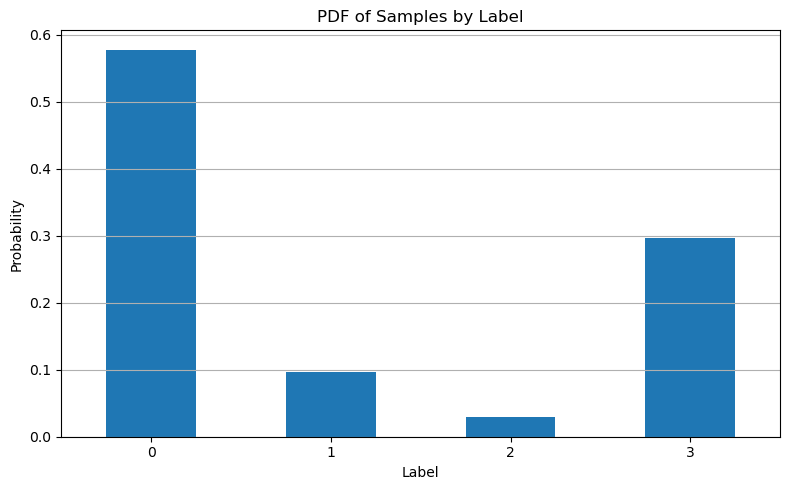

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn tới file .txt
csv_path = os.path.join('..', 'data', 'image_data.txt')

# Đọc file
df = pd.read_csv(csv_path, header=None, names=["path", "name", "magnification", "porosity"])
df["path"] = df["path"].str.replace("\\", "/", regex=False)

# Gán nhãn
bins = [-float('inf'), 0.05, 0.10, 0.20, float('inf')]
labels = [0, 1, 2, 3]
df['label'] = pd.cut(df['porosity'], bins=bins, labels=labels)

# Tính phân phối xác suất (PDF)
label_counts = df['label'].value_counts(normalize=True).sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title('PDF of Samples by Label')
plt.xlabel('Label')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
